In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean
import matplotlib
import os as os
%matplotlib inline

In [ ]:
#                          _________
#ENERGIE CINETIQUE = 1/2 * (U^2+V^2)
files = os.listdir("/bettik/roussilh/noMED-degrad")
Umoy = 0
Vmoy = 0

for filename in files:
    
    if "Ubottomdegrad" in filename:
        fi = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Ubottomdegrad.nc',concat_dim='t', combine='nested')
        vit = fi.degraded_vozocrtx
        Uo =vit[0]
        U = Uo*Uo
        Umoy = U + Umoy
                
    else:
        ju = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Vbottomdegrad.nc',concat_dim='t', combine='nested')
        vit1 = ju.degraded_vomecrty
        V0 = vit1[0]
        V = V0*V0
        Vmoy = V + Vmoy
        
Umoy1 = Umoy/len(files)
Vmoy1 = Vmoy/len(files)        

In [3]:
Umoy1.values.shape

(1181, 1480)

In [4]:
Vmoy1.values.shape

(1182, 1480)

In [5]:
Vmoy2 = np.delete(Vmoy1, -1, axis=0)
Vmoy2.values.shape

(1181, 1480)

In [6]:
Ec = 1/2*(Umoy1 + Vmoy2)

In [7]:
dirf='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Vbottomdegrad.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [8]:
navlon = ds.nav_lon
navlat = ds.nav_lat

In [9]:
navlon.shape

(1182, 1480)

In [10]:
navlat.shape

(1182, 1480)

In [11]:
lon = np.delete(navlon, -1, axis=0)
lon.shape

(1181, 1480)

In [12]:
lat = np.delete(navlat, -1, axis=0)
lat.shape

(1181, 1480)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_78835/1496891290.py:22: Matp

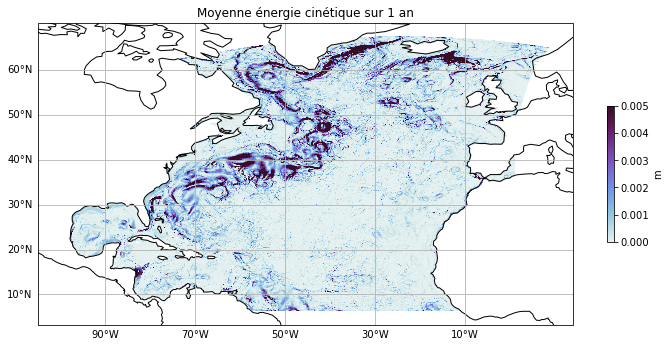

In [13]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,Ec,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=0,vmax=0.005)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne énergie cinétique sur 1 an')
plt.savefig('Moy_Ec_carte_annee.png', bbbox_inches='tight')

In [35]:
#                         ___ ___
#ENERGIE CINETIQUE = 1/2*(U^2+V^2)

files = os.listdir("/bettik/roussilh/noMED-degrad")
Umoyz = 0
Vmoyz = 0

for filename in files:
    
    if "Ubottomdegrad" in filename:
        fiz = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Ubottomdegrad.nc',concat_dim='t', combine='nested')
        vitz = fi.degraded_vozocrtx
        Uoz =vit[0]
        Uz = Uoz
        Umoyz = Uz + Umoyz
                
    else:
        juz = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Vbottomdegrad.nc',concat_dim='t', combine='nested')
        vit1z = juz.degraded_vomecrty
        V0z = vit1[0]
        Vz = V0z
        Vmoy = Vz + Vmoy
        
Umoy1z = Umoy/len(files)
Vmoy1z = Vmoy/len(files)

In [36]:
Umoyenne= Umoy1z * Umoy1z
Vmoyenne= Vmoy1z * Vmoy1z
Vmoyen = np.delete(Vmoyenne, -1, axis=0)
Vmoyen.values.shape

(1181, 1480)

In [38]:
Eci = 1/2*(Umoyenne + Vmoyen)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_78835/476828168.py:21: Matpl

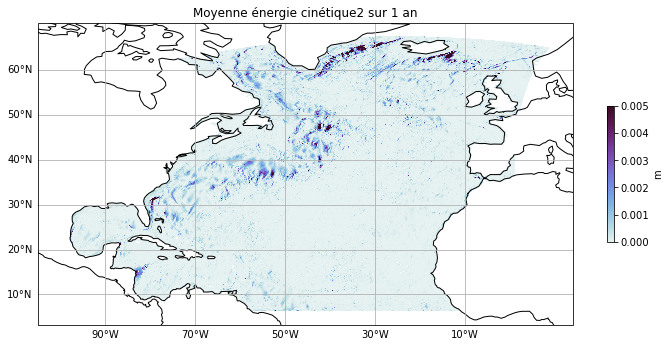

In [39]:
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,Eci,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=0,vmax=0.005)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne énergie cinétique2 sur 1 an')
plt.savefig('Moy_Ec_carte_annee2.png', bbbox_inches='tight')

In [42]:
#Ecart type :

files = os.listdir("/bettik/roussilh/noMED-degrad")



for filename in files:
    
    if "Ubottomdegrad" in filename:
        fi1 = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Ubottomdegrad.nc',concat_dim='t', combine='nested')
        vit0 = fi1.degraded_vozocrtx
        U0 =vit0[0]
        Ua = (U0-Umoy1)*(U0-Umoy1) + Ua
       
                
    else:
        ju1 = xr.open_mfdataset('/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Vbottomdegrad.nc',concat_dim='t', combine='nested')
        vit2 = ju1.degraded_vomecrty
        V2 = vit2[0]
        Va = (V2-Vmoy1)*(V2-Vmoy1) + Va
        
                                                                                    
                                                                                    

In [43]:
V1 = np.delete(Va, -1, axis=0)
V1.shape

(1181, 1480)

In [44]:
Etype = V1 + Ua

/tmp/ipykernel_78835/3891988286.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Moy_Ec_carte_annee.png', bbbox_inches='tight')


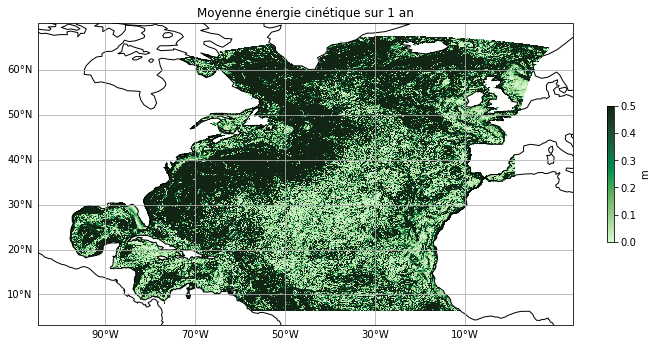

In [51]:
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(lon,lat,Etype,transform=ccrs.PlateCarree(),cmap=cmocean.cm.algae,vmin=0,vmax=0.5)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Moyenne énergie cinétique sur 1 an')
plt.savefig('Moy_Ec_carte_annee.png', bbbox_inches='tight')